# **Tarea Semanal 2**: *Sistemas Lineales e Invariantes en el tiempo*

## Alumna: Salgado, Victoria Jazmín 
### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025

## **Resumen**

En esta tarea semanal se trabajó con Sistemas Lineales Invariantes y respuesta al impulso. Se utilizó el software Spyder mediante WSL. 

## **Introducción**

Se trabajará con sistemas Lineales Invariantes en el tiempo (LTI), modelados a partir de ecuaciones en diferencias. 

Un sistema es aquel que cuando recibe alguna señal de entrada la transforma según las ecuaciones que lo determinen, y devuelve una señal de salida acorde. Estas ecuaciones son las que conforman el modelo. 

En un sistema LTI, su comportamiento y características están fijos en el tiempo. Por ejemplo, un circuito RC será invarinte en el tiempo si los valores de resistencia $R$ y capacitancia $C$ son constantes en el mismo. Por otro lado, otra característica de estos sistemas es que un corrimiento de tiempo en la señal de entrada genera un corrimiento en la señal de salida; por ser lineal, la salida es proporcional a la entrada.

Para el objetivo de este trabajo, una de las características más iportantes de los sistemas LTI es precisamente la propiedad de superposición. Esto es, si se puede representar la entrada a un sistema LTI como una combinación lineal de un conjunto de señales básicas, entonces puede utilizarse también la superposición para obtener la salida del sistema como respuesta a las señales mencionadas. 

La señal básica que se utilizará será el impulso unitario. Como cualquier señal discreta puede representarse como combinación lineal de impulsos unitarios desplazados en el tiempo, es posible caracterizar completamente un sistema LTI en términos de su respuesta al impulso.

Formalmente, una señal discreta puede expresarse como una combinación lineal de impulsos desplazados en el tiempo $\delta[n-k]$, donde los coeficientes de la combinación lineal serán los valores de la señal en cada instante, $x[k]$. Esto último se representa matemáticamente como:

$$
x[n] = \sum_{k=-\infty}^{\infty} x[k] \, \delta[n-k] \tag{1}
$$

donde $\delta[n]$ es el impulso unitario discreto definido como
$$
\delta[n] = 
\begin{cases}
1 & n=0 \\ \tag{2}
0 & n \neq 0
\end{cases}
$$

En la ecuación 1, para cualquier valor de n, sólo uno de los términos de delta de $[n-k]$ es distinto de cero, ya que delta solo vale 1 para $\delta[0]$, esto es cuando $n=k$. El valor que tendrá la señal en ese punto será dado por $x[k]$. Así se obtiene entonces cada $x[n]$ que conformará la señal de entrada. 

Luego, la propiedad de invariancia en el tiempo asegura que las respuestas a impulsos unitarios desplazados son versiones desplazadas en el tiempo de la respuesta original. Es así que la respuesta $y[n]$ del sistema será la superposición de las respuestas al impulso en cada punto en el tiempo. Si se cuenta con un **sistema que cumpla con el requisito de ser lineal e invariante en el tiempo**, éste estará **determinado de manera unívoca por su respuesta al impulso**.

Sea $x[n]$ la señal de entrada y $h[n]$ la respuesta al impulso del sistema.  
La salida $y[n]$ de un sistema LTI se obtendrá como:

$$
y[n]= \sum_{k=-\infty}^{\infty} x[k] \, h[n-k] \tag{3}
$$

Es decir, la convolución de la entrada $x[n]$ con su respuesta al impulso $h[n]$.
Conociendo $h[n]$, será posible predecir la respuesta del sistema ante cualquier entrada $x[n]$.

En este trabajo los sistemas fueron modelados por ecuaciones en diferencias causales, es decir que los valores para un instante n están determinados por valores de la entrada en ese mismo instante o en instantes previos. Además, se considera que a $t<0$ la señal de entrada es igual a 0. 

Finalmente se introduce de manera breve el concepto de filtro digital, que será utilizado hacia el fin del trabajo. Un filtro digital es un sistema LTI que modifica el espectro en frecuencia de la señal de entrada, produciendo una señal de salida con un espectro de frecuencias modificado. 

## **Análisis y Desarrollo**

1) Dada la siguiente ecuación en diferencias que modela un sistema LTI:
$$
y[n] = 3 \cdot 10^{-2} \cdot x[n] + 5 \cdot 10^{-2} \cdot x[n-1] + 3 \cdot 10^{-2} \cdot x[n-2] + 1.5 \cdot y[n-1] - 0.5 \cdot y[n-2] \tag{4}
$$

- Graficar la señal de salida para cada una de las señales de entrada que generó en el TS1. Considere que las mismas son causales.
- Hallar la respuesta al impulso y usando la misma, repetir la generación de la señal de salida para alguna de las señales de entrada consideradas en el punto anterior.
- En cada caso indique la frecuencia de muestreo, el tiempo de simulación y la potencia o energía de la señal de salida.

Se comienza por graficar la señal de salida para las señales de entrada pedidas en la consigna. Por la consideración de que son causales, se considera que a $t=0$ la señal tendrá valor 0. 

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import time as time

In [58]:
N = 3000
fs = 3000

def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, N=1000, fs=2):
    Ts = 1/fs
    tt = np.arange(0, N*Ts, Ts)
    xx = vmax * np.sin(2 * np.pi * ff * tt + ph) + dc
    return tt, xx

tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, N=N, fs=fs)
tt, yy = mi_funcion_sen(vmax=2, dc=0, ff=2, ph=(np.pi)/2, N=N, fs=fs)

#modulacion
tt, mm = mi_funcion_sen(vmax=1, dc=0, ff=0.5, ph=0, N=N, fs=fs)
nn = xx * mm

#recortada en amplitud
a = 1
a_clipped = a*0.75
clipped = np.clip(xx, -a_clipped, a_clipped)

#cuadrada
def cuadrada(vmax=1, dc=0, ff=2000, ph=0, N=1000, fs=400000):
        Ts = 1/fs
        tc = np.arange(0, N*Ts, Ts)
        cc = vmax * np.sign(np.sin(2 * np.pi * ff * tc + ph) + dc)
        return tc, cc
tc, cc = cuadrada(vmax=1, dc=0, ff=1, ph=0, N=N, fs=fs)

#pulso cuadrado 10ms
duracion_ms = 10 
muestras_duracion = int((duracion_ms / 1000) * fs) 

pulso_cuadrado = np.zeros(N, dtype=float)
pulso_cuadrado[:muestras_duracion] = 1 

In [59]:
def calculo_potencia(señal):
    energia = np.sum(np.abs(señal)**2)
    potencia = (1/N)*energia 
    return potencia, energia

Una vez sintetizadas las señales necesarias, se procedió a diseñar una función para obtener la respuesta al sistema de cada una de ellas, es decir la señal de salida para cada *input*, y luego graficarla.

Se implementó un bucle for que itera sobre los instantes de tiempo n. Dado que el sistema es causal, la respuesta y[n] para cualquier instante solo depende de los valores de la entrada x[n-k] para k≤n, les decir de la entrada en ese mismo instante y en los instantes anteriores.

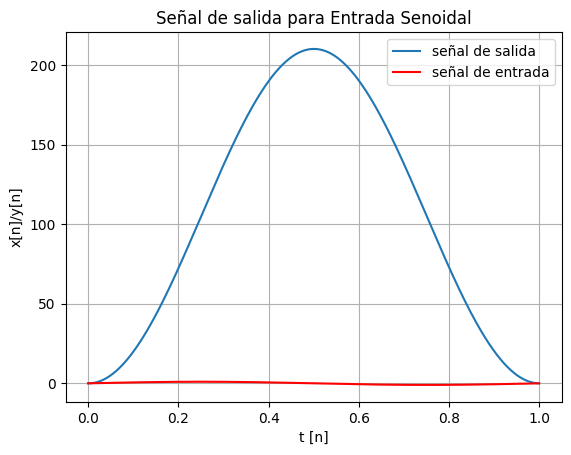

tiempo de simulacion: 0.2943735122680664
Potencia promedio de la señal de salida: 16550.75


In [60]:
start_time1 = time.time()

def respuesta(señal1, tiempo, titulo, figure):
    N_señal = len(señal1)
    Y = np.zeros(N_señal, dtype=float)
    for n in range(N_señal):
        if n==0:
            Y[n] = 3e-2*señal1[n] 
        elif n==1:
            Y[n] = 3e-2*señal1[n] + 5e-2*señal1[n-1] + 1.5*Y[n-1]
        else:     
            Y[n] = 3e-2*señal1[n] + 5e-2*señal1[n-1] + 3e-2*señal1[n-2] + 1.5*Y[n-1] - 0.5*Y[n-2]
    plt.figure(figure)
    plt.plot(tiempo, Y, label="señal de salida")
    plt.plot(tiempo, señal1, label="señal de entrada", color="red")
    plt.title(titulo)
    plt.grid(True)
    plt.xlabel('t [n]')
    plt.ylabel('x[n]/y[n]')
    plt.legend()
    plt.show()
    potencia_salida, energia_salida = calculo_potencia(Y)
    return potencia_salida, energia_salida
    
pot_salida_xx, en_salida_xx = respuesta(xx, tt, 'Señal de salida para Entrada Senoidal', 1)

end_time1 = time.time()
total_time1 = (end_time1 - start_time1)
print('tiempo de simulacion:', total_time1)
print(f"Potencia promedio de la señal de salida: {pot_salida_xx:.2f}")

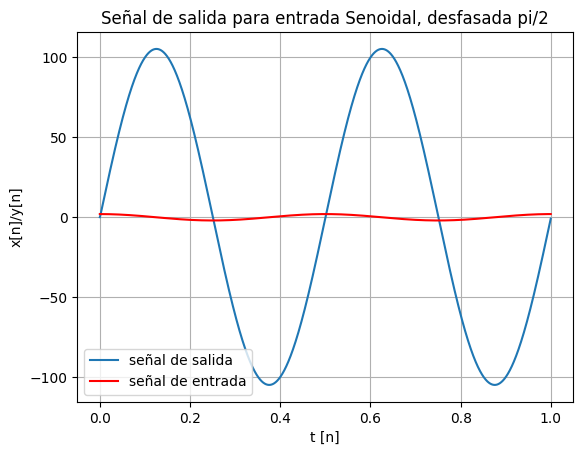

tiempo de simulacion: 0.3346374034881592
Potencia promedio de la señal de salida: 5516.75


In [61]:
start_time2 = time.time()
pot_salida_yy, en_salida_yy = respuesta(yy, tt, 'Señal de salida para entrada Senoidal, desfasada pi/2', 2)
end_time2 = time.time()
total_time2 = (end_time2 - start_time2)
print('tiempo de simulacion:', total_time2)
print(f"Potencia promedio de la señal de salida: {pot_salida_yy:.2f}")

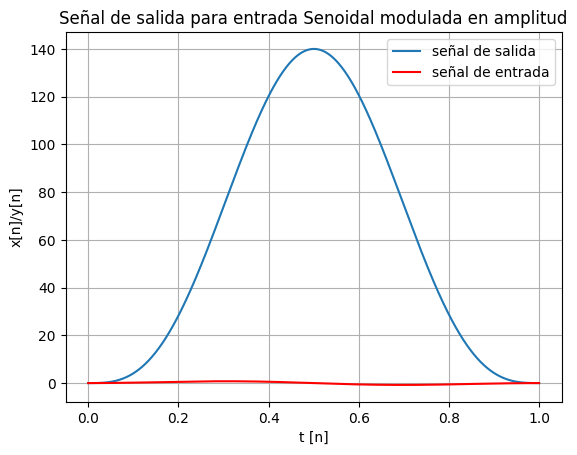

tiempo de simulacion: 0.27585887908935547
Potencia promedio de la señal de salida: 6129.90


In [62]:
start_time3 = time.time()
pot_salida_nn, en_salida_nn = respuesta(nn, tt, 'Señal de salida para entrada Senoidal modulada en amplitud', 3)
end_time3 = time.time()
total_time3 = (end_time3 - start_time3)
print('tiempo de simulacion:', total_time3)
print(f"Potencia promedio de la señal de salida: {pot_salida_nn:.2f}")

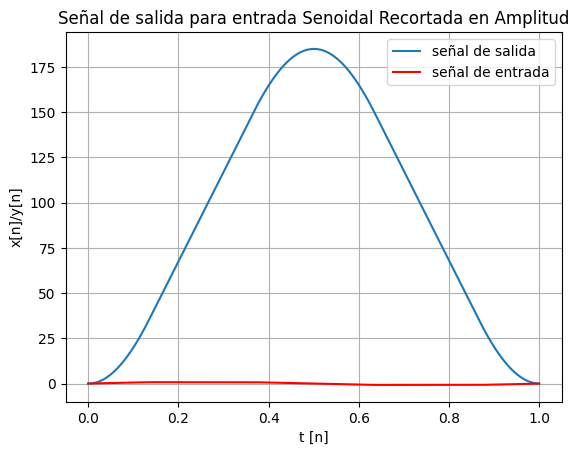

tiempo de simulacion: 0.27585887908935547
Potencia promedio de la señal de salida: 12601.57


In [63]:
start_time4 = time.time()
pot_salida_clipped, en_salida_clipped = respuesta(clipped,tt, 'Señal de salida para entrada Senoidal Recortada en Amplitud', 4)
end_time4 = time.time()
total_time4 = (end_time4 - start_time3)
print('tiempo de simulacion:', total_time3)
print(f"Potencia promedio de la señal de salida: {pot_salida_clipped:.2f}")

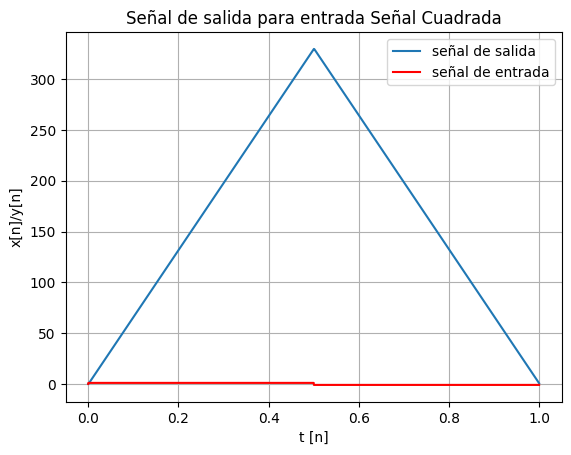

tiempo de simulacion: 0.3295612335205078
Potencia promedio de la señal de salida: 36299.88


In [64]:
start_time5 = time.time()
pot_salida_cc, en_salida_cc = respuesta(cc, tc, 'Señal de salida para entrada Señal Cuadrada', 5)
end_time5 = time.time()
total_time5 = (end_time5 - start_time5)
print('tiempo de simulacion:', total_time5)
print(f"Potencia promedio de la señal de salida: {pot_salida_cc:.2f}")

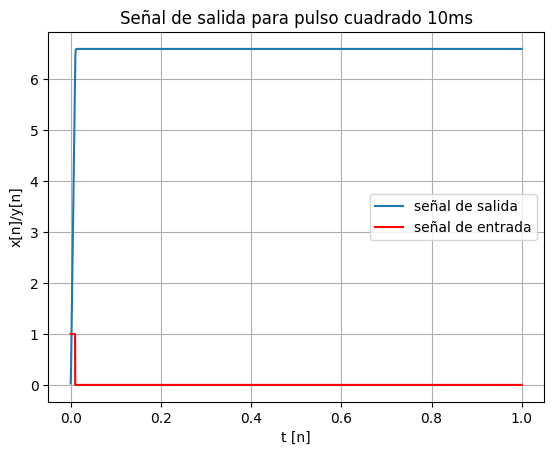

tiempo de simulacion: 0.35088396072387695
Energía de la señal de salida: 129740.17


In [65]:
start_time6 = time.time()
pot_salida_pulso, en_salida_pulso = respuesta(pulso_cuadrado, tt, 'Señal de salida para pulso cuadrado 10ms', 6)
end_time6 = time.time()
total_time6 = (end_time6 - start_time6)
print('tiempo de simulacion:', total_time6)
print(f"Energía de la señal de salida: {en_salida_pulso:.2f}")

En los gráficos anteriores se observan las señales de salida del sistema modelado por la ecuación (4). La respuesta al sistema estará dada por la ecuación de diferencias, por lo que es dificil intuir o predecir cómo será la salida. Se observa un pico (de diferente amplitud según la señal de entrada) para todas las salidas, excepto la senoidal desfasada, que en el mismo intervalo temporal presenta dos períodos. Por otro lado, la respuesta al pulso cuadrado es similar cualitativamente a la salida de la respuesta al impulso del sistema, como se verá más adelante. 

Una vez graficadas las señales de salida resolviendo el sistema de manera analítica para cada $n$, se procede a calcular la respuesta al impulso del sistema LTI. Para ello se diseña un impulso:

Text(0.5, 1.0, 'Impulso')

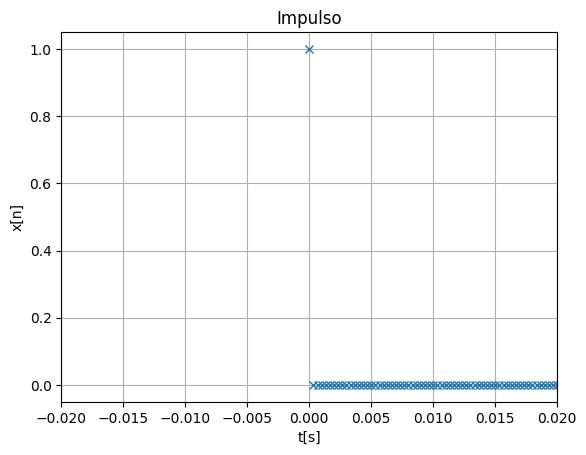

In [66]:
#impulso
Ts = 1/fs
tp = np.arange(0, N*Ts, Ts)
P = np.zeros(N, dtype = float)
start = 0
P[start] = 1

#para ver el impulso
plt.figure(6)
plt.plot(tt, P, 'x')
plt.grid(True)
plt.xlim([-0.02, 0.02])
plt.xlabel('t[s]')
plt.ylabel('x[n]')
plt.title('Impulso')

Luego se procede a utilizar el impulso como señal de entrada para el sistema LTI

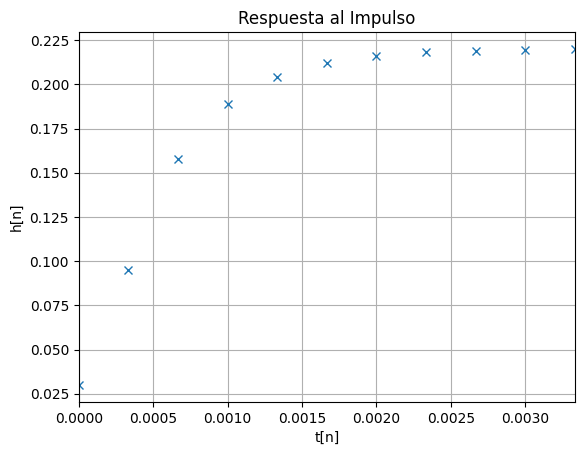

tiempo de simulacion: 0.33201169967651367
energia del impulso truncado: 145.0633333333331


In [67]:
start_time7 = time.time()
Z = np.zeros(N, dtype=float)
for n in range(N):
        if n==0:
            Z[n] = 3e-2*P[n] 
        elif n==1:
            Z[n] = 3e-2*P[n] + 5e-2*P[n-1] + 1.5*Z[n-1]
        else:     
            Z[n] = 3e-2*P[n] + 5e-2*P[n-1] + 3e-2*P[n-2] + 1.5*Z[n-1] - 0.5*Z[n-2]
            
plt.figure(7)
plt.plot(tt, Z, 'x')
plt.title("Respuesta al Impulso")
plt.grid(True)
plt.xlabel('t[n]')
plt.ylabel('h[n]')
plt.xlim([0, 10/fs]) #para que el limite sea en segundos
plt.show()

end_time7 = time.time()
total_time7 = (end_time7 - start_time7)
print('tiempo de simulacion:', total_time7)
potencia_h, energia_h = calculo_potencia(Z)
print("energia del impulso truncado:", energia_h)

Gracias al gráfico de la respuesta al impulso del sistema, puede determinarse que se trata de un LTI con memoria, ya que $h[n] \neq$0 para valores de $n\neq$0.
Esto tiene sentido ya que puede verse en la ecuación que determina al sistema que ésta se retroalimenta, es decir, utiliza valores anteriores de la señal de salida y[n] para determinar el valor de esta en un momento dado. 
Por último, es importante destacar que la energía del impulso se calcula solo en el intervalo de N muestras, ya que el sistema es inestable y, teóricamente, su respuesta al impulso crece de forma indefinida. Al estar truncada, la señal de impulso en este contexto no es una señal de energía infinita, lo que permite calcular su energía total.

Se continúa por calcular la señal de salida del sistema utilizando la respuesta al impulso del mismo, determinada anteriormente. Esto se hará mediante la suma de convolución, como se explicó en la introducción.

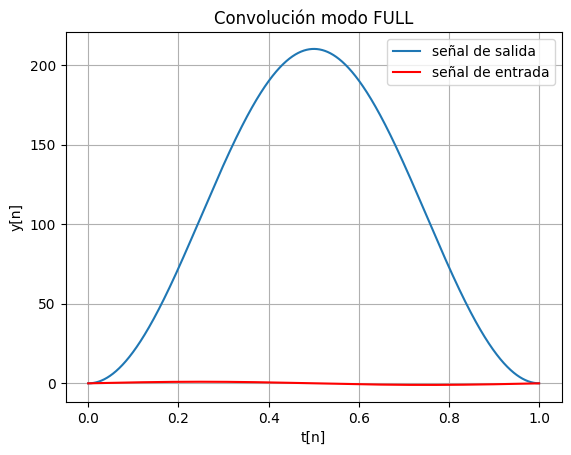

tiempo de simulación: 0.3047943115234375
potencia promedio de señal de salida - convolución modo FULL: 16550.747698524512


In [68]:
start_time8 = time.time()
y = np.zeros(N, dtype=float)

y = np.convolve(xx,Z)[:N]

plt.figure(8)        
plt.plot(tt, y, label="señal de salida")
plt.plot(tt, xx, color="red", label="señal de entrada")
plt.grid(True)
plt.xlabel('t[n]')
plt.ylabel('y[n]')
plt.legend()
plt.title("Convolución modo FULL")
plt.show()

end_time8 = time.time()
total_time8 = (end_time8 - start_time8)
print('tiempo de simulación:', total_time8)
pot_convolucion, e_convolucion = calculo_potencia(y)
print("potencia promedio de señal de salida - convolución modo FULL:", pot_convolucion)

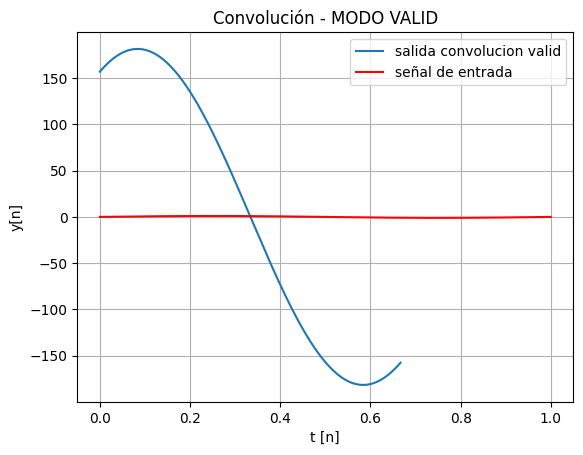

tiempo de simulación: 0.25570225715637207
potencia promedio de señal de salida - convolución modo FULL: 13291.010326966161


In [69]:
start_time9 = time.time()
#CONVOLUCION VALID
#truncar respuesta al impulso
Lh = N//3
h = Z[:Lh]

#longitud de la salida N - Lh + 1
y_valid = np.convolve(xx, h, 'valid')
len_yvalid = len(y_valid)
tt_valid = tt[:len_yvalid]

plt.figure(8)        
plt.plot(tt_valid, y_valid, label="salida convolucion valid")
plt.plot(tt, xx, color="red", label="señal de entrada")
plt.grid(True)
plt.legend()
plt.xlabel('t [n]')
plt.ylabel('y[n]')
plt.title('Convolución - MODO VALID')
plt.show()

end_time9 = time.time()
total_time9 = (end_time9 - start_time9)
print('tiempo de simulación:', total_time9)

pot_convolucion_valid, e_convolucion_valid = calculo_potencia(y_valid)
print("potencia promedio de señal de salida - convolución modo FULL:", pot_convolucion_valid)

Se comenzó por utilizar el modo full, que es el modo por defecto de NumPy para la función np.convolve. En este caso, ya que este modo calcula la convolución completa y se utilizó una respuesta al impulso lo suficientemente larga (que representa el comportamiento del sistema IIR), se obtuvo una señal de salida que es igual a la obtenida con las ecuaciones en diferencias. Esto demuestra que la convolución es una forma válida de calcular la respuesta de un sistema si se conoce su respuesta al impulso. Este modo devuelve el resultado completo, incluyendo donde las señales se superponen parcialmente, por lo que no evita los fenómenos transitorios.

Luego se eligió el modo valid. Este modo solo considera como salidas válidas de la convolución aquellas donde ambas señales (en este caso, la respuesta al impulso truncada y la señal de entrada) se superponen completamente, evitando así los efectos de borde. Debido a que la convolución se realizó con una respuesta al impulso truncada se obtuvo una señal de salida diferente a la obtenida con las ecuaciones en diferencias y a la convolución anterior.

Esto se observa claramente en el gráfico, donde la salida de la convolución en modo valid es considerablemente más corta que la entrada, ya que se descartan los transitorios de los extremos.

Por último, se diseñaron dos tablas para exponer, por cada señal de entrada, el tiempo de simulación, la frecuencia de muestreo y la potencia promedio o energía según corresponda para cada señal de salida.

**Tabla 1**: Señales Periódicas

A continuación se presentan los resultados para las señales de salida periódicas. Para este tipo de señales, el análisis se realiza en términos de potencia promedio, que se calcula utilizando la siguiente fórmula:
$$
P = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2
$$

In [78]:
import pandas as pd
from IPython.display import display

datos = {
    "Señal Entrada": ["Senoidal", "Senoidal Desfasada", "Senoidal Recortada en Amp", "Modulada", "Cuadrada", "Convolucion Full", "Convolucion Valid"],
    "Tiempo Simulacion": [total_time1, total_time2, total_time3, total_time4, total_time5, total_time8, total_time9],
    "Potencia Promedio": [pot_salida_xx, pot_salida_yy, pot_salida_clipped, pot_salida_nn, pot_salida_cc, pot_convolucion, pot_convolucion_valid],
    "Frecuencia de Muestreo": [fs, fs, fs, fs, fs, fs, fs],
}

df = pd.DataFrame(datos)
df_styled = df.style.set_caption("Potencia Promedio de la Señal de Salida y Tiempo de Simulación").hide(axis="index").format({"Potencia Promedio": "{:.2f}"})
display(df_styled)

Señal Entrada,Tiempo Simulacion,Potencia Promedio,Frecuencia de Muestreo
Senoidal,0.294374,16550.75,3000
Senoidal Desfasada,0.334637,5516.75,3000
Senoidal Recortada en Amp,0.275859,12601.57,3000
Modulada,0.559817,6129.90,3000
Cuadrada,0.329561,36299.88,3000
Convolucion Full,0.304794,16550.75,3000
Convolucion Valid,0.255702,13291.01,3000


Resulta interesante ver en la tabla anterior que el tiempo de simulación varía considerablemente según la señal de entrada. 
Para la señal de entrada senoidal, la simulación mediante la ecuación en diferencias y la convolución en modo 'full' presentan tiempos de cálculo muy similares (0.29s y 0.30s, respectivamente). Esto tiene sentido matemáticamente, ya que ambas operaciones implican una complejidad computacional similar: mientras la ecuación en diferencias calcula la salida de forma recursiva, la convolución en modo completo realiza una serie equivalente de sumas y productos y ambas tienen en cuenta los fenómenos transitorios. 

Relizar la convolución en modo valid baja considerablemente el tiempo de simulación por devolver una señal más corta, ya que descarta los efectos de borde y conlleva una menor cantidad de operaciones computacionales. 

**Tabla 2**: Señales de Energía Finita

Esta segunda tabla expone los datos para las señales de salida no periódicas y de duración finita. En estos casos, la magnitud de interés es la energía, ya que la señal no se repite y su duración es limitada. La energía se calcula sumando el cuadrado de la amplitud de cada una de las muestras, según la fórmula:

$$
E = \sum_{n=0}^{N-1} |x[n]|^2
$$

In [79]:
datos2 = {
    "Señal Entrada": ["Pulso Cuadrado", "Rta. al impulso"],
    "Tiempo Simulacion": [total_time6, total_time7],
    "Energía": [en_salida_pulso, energia_h],
    "Frecuencia de Muestreo": [fs, fs]
}

df = pd.DataFrame(datos2)
df_styled = df.style.set_caption("Energía de la Señal de Salida y Tiempo de Simulación").hide(axis="index").format({"Energía": "{:.2f}"})
display(df_styled)

Señal Entrada,Tiempo Simulacion,Energía,Frecuencia de Muestreo
Pulso Cuadrado,0.350884,129740.17,3000
Rta. al impulso,0.332012,145.06,3000


En el caso del pulso cuadrado y de la respuesta al impulso resulta interesante ver que la energía de la señal difiere en gran magnitud, lo que es atribuible a la diferencia en el tiempo de actividad de cada señal de entrada.

2) Hallar la respuesta al impulso y la salida correspondiente a una señal de entrada senoidal en los sistemas definidos mediante las siguientes ecuaciones en diferencias:
   
\begin{align}
y[n] &= x[n] + 3 \cdot x[n-10] \tag{5} \\ 
y[n] &= x[n] + 3 \cdot y[n-10] \tag{6}
\end{align}

Para la ecuacion $(5)$:

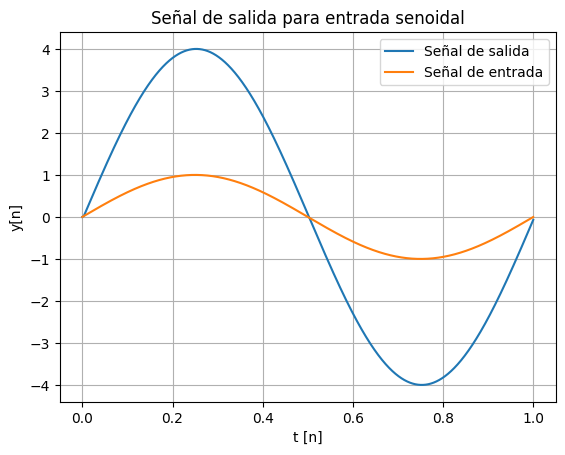

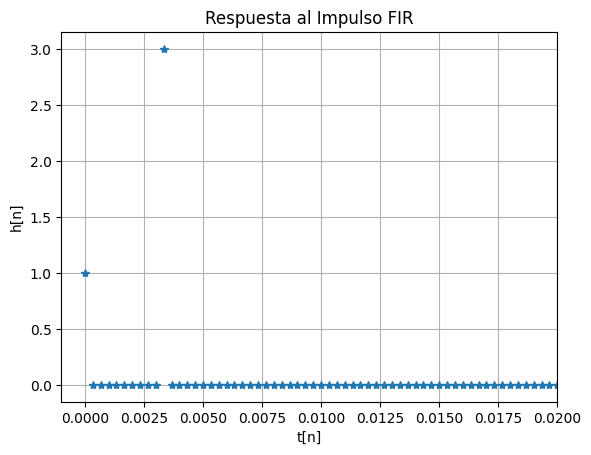

In [72]:
tt, sen_2 = mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, N=N, fs=fs)

def respuesta_2(señal, figure):
    A = np.zeros(N, dtype=float)
    for n in range(N):
        if n in range(10):
            A[n] = sen_2[n] #considero causal
        else:     
            A[n] = sen_2[n] + 3*sen_2[n-10]          
    plt.figure(figure)        
    plt.plot(tt, A, label='Señal de salida')
    plt.plot(tt, sen_2, label='Señal de entrada') 
    plt.grid(True)
    plt.xlabel('t [n]') 
    plt.ylabel('y[n]')     
    plt.title('Señal de salida para entrada senoidal')
    plt.legend()
    plt.show()
    
respuesta_2(sen_2, 10)

#respuesta al impulso, ya definí el impulso antes
B = np.zeros(N, dtype=float)
for n in range(N):
    if n in range(10):
        B[n] = P[n] 
    else:     
        B[n] = P[n] + 3 * P[n-10] 
        
plt.figure(11)        
plt.plot(tt, B, '*')
plt.grid(True)
plt.xlabel('t[n]') 
plt.ylabel('h[n]')      
plt.title('Respuesta al Impulso FIR')
plt.xlim([-0.001, 0.02])
plt.show()


Luego, para la ecuación $(6)$ 

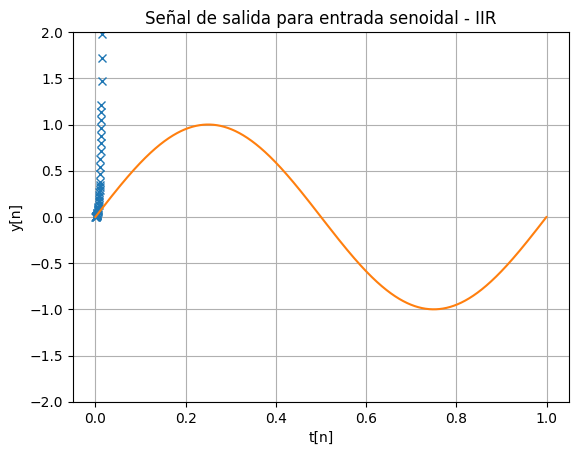

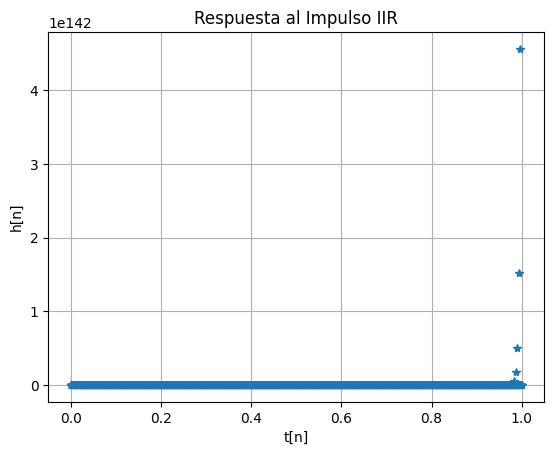

In [73]:
def respuesta_3(señal, figure):
    F = np.zeros(N, dtype=float)
    for n in range(N):
        if n in range(10):
            F[n] = sen_2[n] 
        else:     
            F[n] = sen_2[n] + 3*F[n-10]          
    plt.figure(figure)        
    plt.plot(tt, F, 'x', label = 'Señal de salida')
    plt.plot(tt, sen_2, label = 'Señal de entrada') 
    plt.grid(True)
    plt.xlabel('t[n]') 
    plt.ylabel('y[n]')      
    plt.title('Señal de salida para entrada senoidal - IIR')
    plt.ylim([-2,2])
    plt.show()
    
respuesta_3(sen_2, 12)

#respuesta al impulso, ya definí impulso antes
G = np.zeros(N, dtype=float)
for n in range(N):
    if n in range(10):
        G[n] = P[n]
    else:     
        G[n] = P[n] + 3*G[n-10] 
        
plt.figure(13)        
plt.plot(tt, G, '*')
plt.grid(True)
plt.xlabel('t[n]') 
plt.ylabel('h[n]')  
plt.title('Respuesta al Impulso IIR')
plt.show()

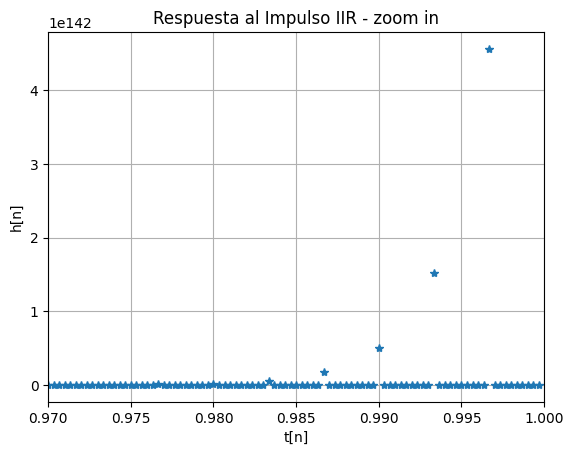

In [74]:
#zoom in
plt.figure()        
plt.plot(tt, G, '*')
plt.grid(True)
plt.xlabel('t[n]') 
plt.ylabel('h[n]')  
plt.title('Respuesta al Impulso IIR - zoom in')
plt.xlim([0.97, 1])
plt.show()

A continuación el análisis de los gráficos obtenidos para cada ecuación. 
- Ecuación (5): Se observa una respuesta al impulso finita, con valores de salida distintos de cero solo en algunos instantes, y luego nula.
  Por otro lado, la señal de salida en comparación a la de entrada es similar a lo que sucedió en con la ecuacion $2$, observándose una señal de salida periódica pero con una amplitud mayor que la de la señal de entrada.
  Teniendo en cuenta la característica de la respeusta al impulso y que la ecuación no es recursiva (ya que no depende de momentos pasados de salida) se concluye que se trata la ecuación modela  un filtro FIR (*Finite Impulse Response*).
- Ecuación (6): En este caso,la respuesta al impulso no está acotada ni tiende a cero, sino que crece alcanzando valores de salida muy grandes luego de algunos instantes. Esto es propio de un filtro IIR (*Infinite Impulse Response*) que es aquel con respuesta infinita al impulso y caracterizada por tener una retroalimentación de la señal de salida, como la tiene la ecuación (6).
  Además, la señal de salida también toma valores muy grandes luego de algunos momentos.

   Teniendo en cuenta lo expuesto arriba, los resultados gráficos obtenidos son consistentes con lo esperado. 

## **Bonus**

Discretizar la siguiente ecuación diferencial correspondiente al modelo de Windkessel que describe la dinámica presión-flujo del sistema sanguíneo:

$$
C\cdot\frac{dP}{dt}+\frac{1}{R}⋅P=Q \tag{7}
$$
Considere valores típicos de Compliance y Resistencia vascular.

El modelo de Windkessel es utilizado para describir la forma de la onda de presión arterial, es decir del bombeo de sangre desde el corazón hacia el sistema arterial (o pulmonar). Ésta descripción se realiza en términos de parámetros como Compliance Arterial y la Resistencia Perifética. 

En este modelo, se compara al corazón y al sistema arterial sistémico con un circuito hidráulico cerrado, que contiene una bomba de agua conectada a una cámara de aire. Este circuito está lleno de agua exceptuando un reservorio de aire dentro de la cámara (del alemán, Windkessel). Cuando entra agua en la cámara, ésta comprime el aire en el reservorio y adeḿas impusla agua hacia afuera y de vuelta al circuito. 

En esta representación, la compresibilidad del aire simula la elasticidad de la aorta cuando el corazón bombea sangre a través de ella, lo que se conoce como *compliance*. Por otro lado, la resistencia que encuentra el agua al salir de la cámara simula la resistencia periférica, es decir la resistencia que enfrenta el corazón para bombear la sangre hacia el sistema arterial.

En términos fisiológicos, el efecto Windkessel ayuda a amoritugar la variación de la presión arterial a lo largo del ciclo cardíaco, permitiendo mantener el flujo sanguíneo hacia los órganos duránte la diástole (fase del ciclo cardíaco donde no hay eyección cardíaca). 

En la ecuación 7:
 - C: Compliance. Relación entre variación de volumen y variación de presión de la aorta. $[\frac{cm³}{mmHg}]$
 - R: Resistencia periférica (constante de proporcionalidad de flujo-presión) del sistema arterial $[\frac{mmHg \cdot s}{cm³}]$)
 - P: Presión sanguínea en la aorta ($[mmHg]$) en función del tiempo
 - Q: Flujo de sangre del corazón a la aorta, en $[\frac{cm³}{s}]$

Ésta relación es análoga a que la que se observa entre la corriente eléctria $I(t)$ y el potencial eléctrico variable en el tiempo $V(t)$ en un circuito eléctro $RC$ configurado de manera equivalente, como se muestra a continuación:

![Windkessel de dos elementos](https://www.civilized.com/mlabexamples/windkesmodel.htmld/wk2.gif)

*Éste modelo es conocido como el Modelo de Windkessel de dos elementos.* 

Para discretizar la ecuación, se optó por el método de Euler. 
Un problema de valor inicial PVI asociado a la ecuación diferencial tiene la forma:

$$
\begin{cases}
y' = f(t,y) \\
y(t0) = y0 \tag{8}
\end{cases}
$$

Y según el método elegido, es posible discretizar de la siguiente manera: 
$$
y_(k+1) = y_k + hf(t_k,y_k) \tag{9}
$$

Se despeja entonces la derivada de la presión sanguínea P (en el método, $y'$) y se implementa el siguiente código:

Observación: las constantes necesarias para resolver esta parte del trabajo se recuperaron de este recurso: *https://www.civilized.com/mlabexamples/windkesmodel.htmld¨* donde se resuelven modelos de Windkessel en MATLAB. Además, se modela el flujo de entrada a la aorta (q_in) ya que este no es constante a lo largo del ciclo cardíaco, con el fin de obtener una representación más realista de la dinámica del sistema.

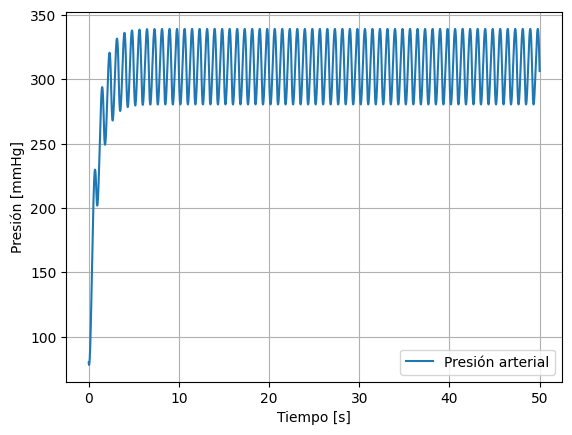

In [75]:
W_n = 50000

C = 0.8
R = 1.15
q0 = 424.11   # amplitud de flujo
pl = 72       # latidos por minuto
s = 60/pl     # duración de ciclo cardíaco
h = 0.001     # paso (segundos)

W = np.zeros(W_n, dtype=float)
W[0] = 80     # presión inicial (ejemplo fisiológico)
t = np.arange(0, W_n*h, h)
q_in = np.zeros(W_n)

for k in range(W_n-1):
    # flujo entrante durante el ciclo cardíaco
    q_in[k] = q0 * np.sin(np.pi * (t[k] % s) / s)
    W[k+1] = W[k] + h*((q_in[k] - (1/R)*W[k])/C) #implementación discretización

plt.figure()
plt.plot(t, W, label="Presión arterial")
plt.xlabel("Tiempo [s]")
plt.ylabel("Presión [mmHg]")
plt.grid(True)
plt.legend()
plt.show()


El gráfico obtenido representa la presión sanguínea generada por el bombeo del corazón hacia el sistema arterial a lo largo del tiempo.
Es interesante observar que este comportamiento es análogo al de un circuito RC: luego de un tiempo (para circuitos RC, aproximadamente $5 \tau$, donde $\tau$ es la constante de tiempo del capacitor), la diferencia de potencial se estabiliza.

En el modelo de Windkessel, donde se grafica la presión arterial, el concepto es el mismo: luego de cierto tiempo, el sistema se estabiliza manteniendo los valores de presión acotados.
Esto tiene sentido fisiológico: el sistema actúa como un filtro, amortiguando los picos de presión, lo cual es necesario para proteger el sistema circulatorio. Además, es coherente que la presión oscile dentro de cada ciclo cardíaco, ya que el corazón bombea durante la sístole y no lo hace durante la diástole.

En conclusión, los resultados obtenidos son consistentes con lo esperado.

## **Conclusión**
Fue posible llevar a cabo la actividades planteadas, observando satisfactoriamente los fenómenos esperados y pudiendo constatar prácticamente los conceptos teóricos. 
Se demostró que las ecuaciones en diferencias definen el comportamiento de un sistema y que los coeficientes de realimentación pueden provocar que la señal de salida crezca indefinidamente. También se comprobó cómo los sistemas LTI están completamente determinados por su respuesta al impulso y cómo puede utilizarse la convolución completa para obtener los mismos resultados que con las ecuaciones en diferencias, o utilizar el modo válido de la convolucion para evitar los fenómenos de borde. 
Además, se logró calcular la potencia o energía de las señales de salida según correspondiera, además del tiempo de simulación de cada caso. 

## **Autoevaluación del Aprendizaje**
Resolví la tarea, pero tengo dudas (en cuanto a número de muestras para el sistema LTI del ejercicio 1).
Pude fijar muchos conceptos teóricos relacionados con los sitemas LTI y me pareció muy interesante el modelo de Windkessel del ejercicio Bonus. 
Usé ChatGPT y Gemini. Las utilicé para corroborar conceptos teóricos.

## **Bibliografía**
- Oppenheim, A. V., Willsky, A. S., y Nawab, S. H. (1998). Señales y Sistemas. Prentice-Hall Hispanoamericana S.A.
- http://www0.unsl.edu.ar/~senysis/apuntes/Tema2.pdf
- Solving Windkessel Models with MLAB. (2025). Civilized.com. https://www.civilized.com/mlabexamples/windkesmodel.htmld/
- Manuel, J., & De La Rosa, M. (n.d.).FUNDAMENTOS TEÓRICOS: FILTROS. https://biblus.us.es/bibing/proyectos/abreproy/11375/fichero/MEMORIA%252FFundamentos+teoricos.pdf

‌